In [42]:
from skimage.io import imread
import matplotlib.pyplot as plt
import pandas
from sklearn.cluster import KMeans
import numpy as np
from skimage import img_as_float32, img_as_ubyte
from skimage.restoration import denoise_tv_bregman, denoise_nl_means
import pylab
import math
%matplotlib inline
plt.rcParams["figure.figsize"] = (50,25)

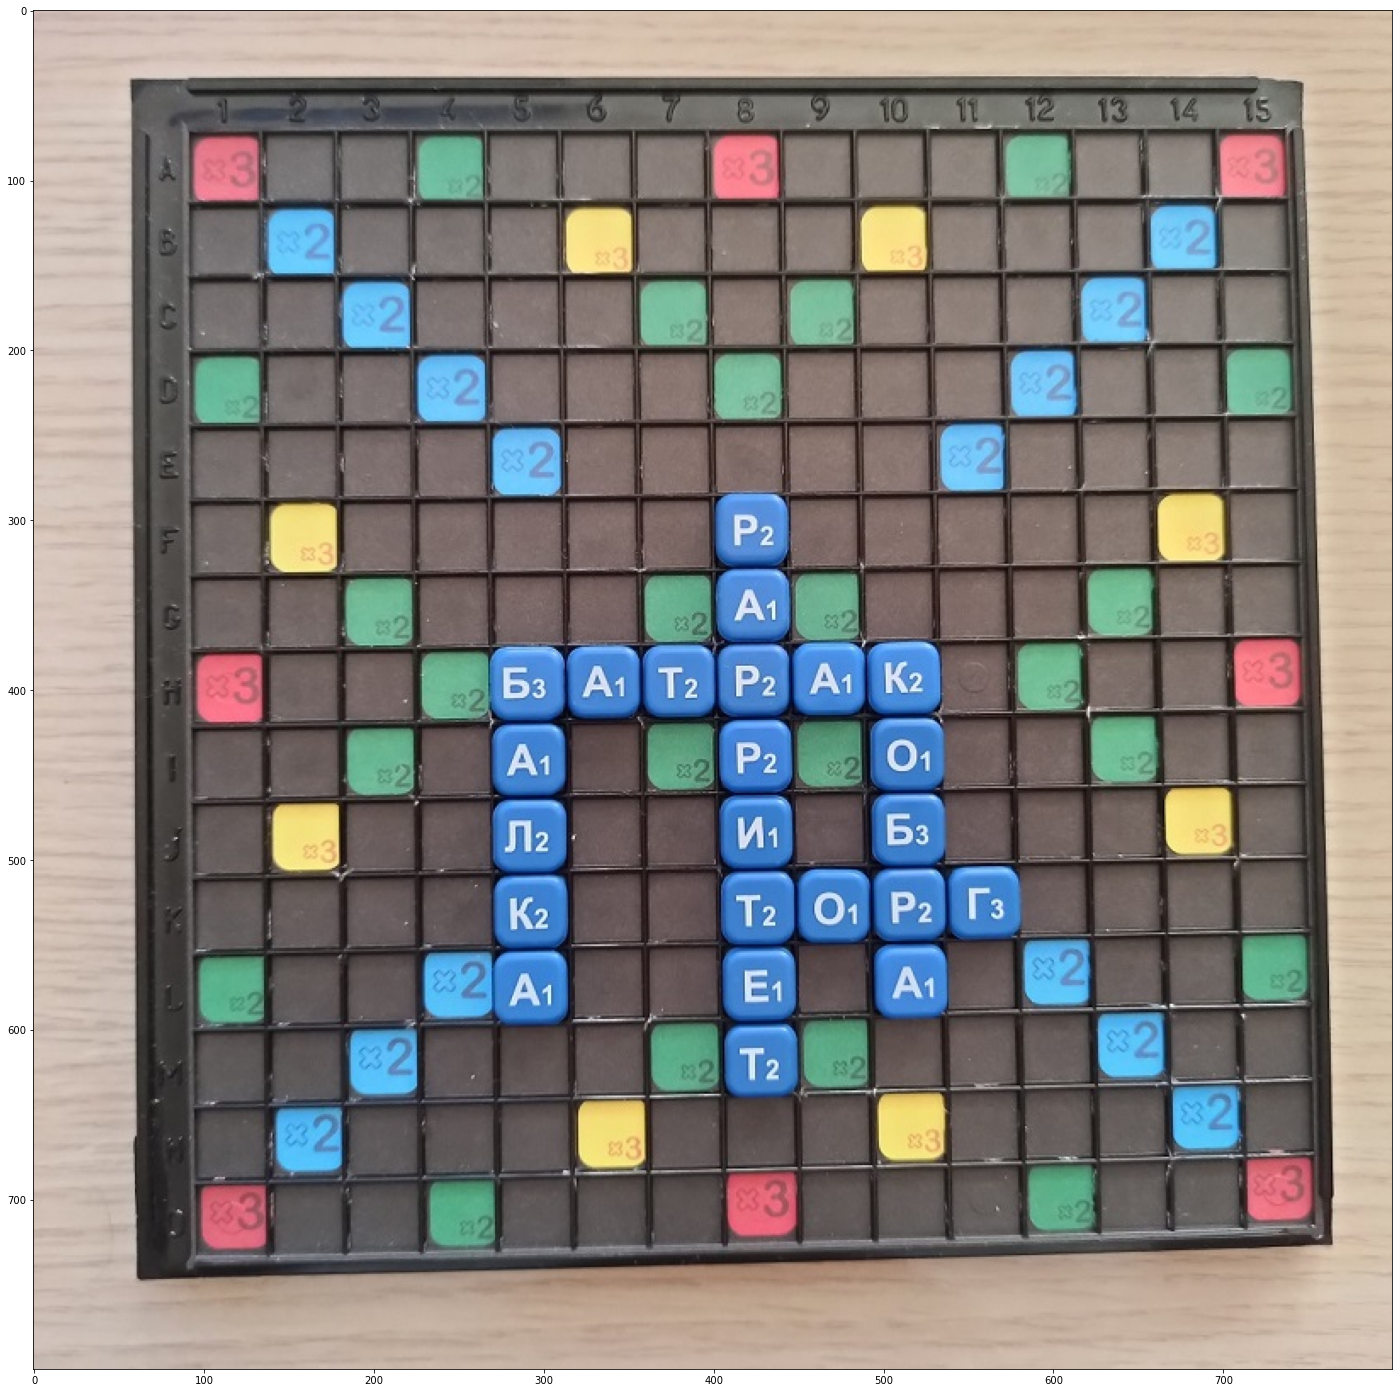

In [51]:
img = img_as_ubyte(imread('../CV/test3.jpg'))
pylab.imshow(img)

In [52]:
pixels = pandas.DataFrame(np.reshape(img, (img.shape[0]*img.shape[1], img.shape[2])), columns=['R', 'G', 'B'])

In [56]:

model = KMeans(n_clusters=2, init='k-means++', random_state=241)
model.fit(pixels.loc[:,'R':'B'])
pixels['Cluster'] = model.predict(pixels.loc[:,'R':'B'])

means = pixels.groupby('Cluster').mean().values
mean_pixels = [means[x] for x in pixels['Cluster']]
mean_image = np.reshape(mean_pixels, (img.shape[0],img.shape[1],img.shape[2]))

medians = pixels.groupby('Cluster').median().values
median_pixels = [medians[x] for x in pixels['Cluster']]
median_image = np.reshape(median_pixels, (img.shape[0],img.shape[1],img.shape[2]))

In [57]:
img_means = img_as_ubyte(np.array(mean_image, dtype=np.uint8))

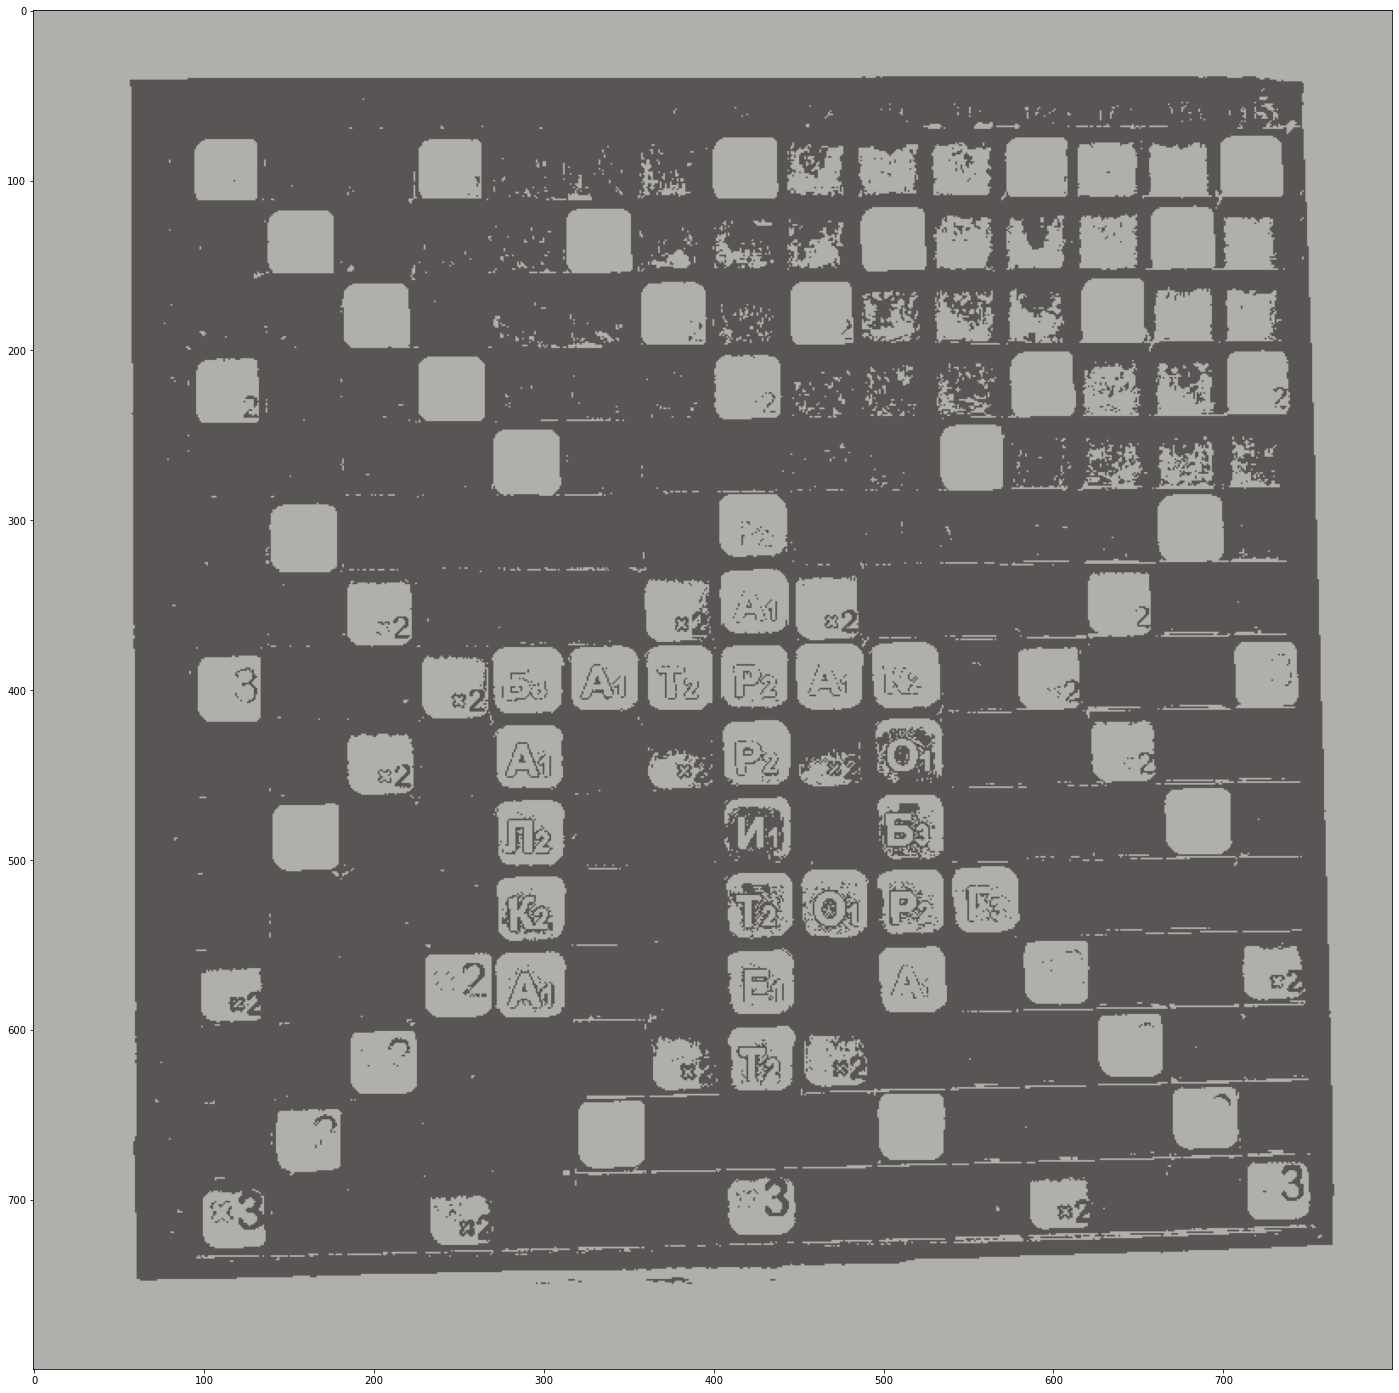

In [58]:
pylab.imshow(img_means)

In [49]:
pylab.imshow(denoise_tv_bregman(img_means, weight=2))

MemoryError: Unable to allocate 56.4 MiB for an array with shape (1359, 1359, 4) and data type float64

<Figure size 3600x1800 with 1 Axes>